In [1]:
import logomaker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%config InlineBackend.figure_format='retina'

In [2]:
#### Global ylim
ylim = [-1.5, 1.5]
# -Rif sample names
noRif_sample_names = ['CP21', 'CP23', 'CP27']
# +Rif sample names
pRif_sample_names = ['CP22', 'CP24', 'CP28']

In [3]:
# Helper function to plot logos for each sample for range of positions
def plot_bias_range_logos(x_loc_range,
                     axis_col,
                     axs,
                     df,
                     template_prob_mat,
                     num_reads,
                     sample_name,
                     ylim,
                     center_values=True,
                     flip_below=False):
    """
    x_loc_range: cross link range to plot logos for each sample
    axis_col: each sample will be plotted columnwise. 
                axis_col is and integer as an index of the column
    axs: matplotlib axis array
    df: pivot dataframe for each sample
    num_reads: dataframe containing number of reads for each location.
    template_prob_mat: the probability weights of the template 
    """
    seqs = CP_df['pe']
    for k, x_loc in enumerate(x_loc_range):
        ax = axs[k,axis_col]
        fg_ct = CP_df[str(x_loc)].values
        n_reads = num_reads[str(x_loc)]
        fg_prob_mat = logomaker.alignment_to_matrix(sequences=seqs, 
                                                    to_type='probability',
                                                    counts=fg_ct)
        enrich_mat = np.log2(fg_prob_mat/template_prob_mat)
        # Start at +3 instead of 0 for the enrichement matrix
        enrich_mat.index = enrich_mat.index+3
        logo = logomaker.Logo(enrich_mat, 
                              center_values=center_values, 
                              ax=ax,
                              flip_below=flip_below)
        logo.style_spines(visible=False)
        
        title = 'sample {}\n cross link +{}\n A-site +{}\n num_reads {:,}'.format(sample_name,
                                     x_loc,x_loc-5, int(n_reads))
        
        ax.set_title(title)
        ax.axvline(x=x_loc-0.5, linewidth=2, ls='--', color='k')
        ax.set_ylim(ylim)
        logo.highlight_position_range(int(x_loc)-2,
                                      int(x_loc)+2,
                                      color='lavender',
                                      alpha=1, linewidth=1)
        ax.set_xticks(np.arange(3,14))

#### Template logo for 2020 XACT-seq paper

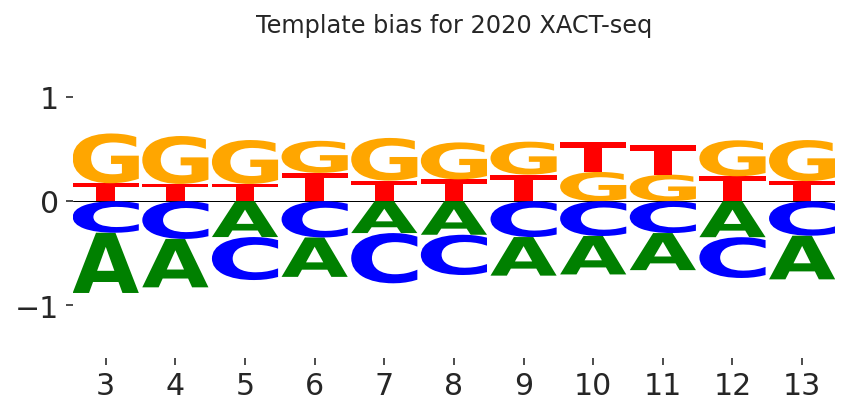

In [4]:
template_weight_df = pd.read_csv('2020_XACT_seq_data/template_weight_df_2020.csv.gz',
                                 index_col='pos')
fig, ax = plt.subplots(1,1, figsize = (6,3))
logo = logomaker.Logo(template_weight_df, 
                      flip_below=False, ax=ax)
logo.style_spines(visible=False)
ax.set_ylim(ylim)
ax.set_xticks(np.arange(3,14))
ax.set_title(f'Template bias for 2020 XACT-seq')
plt.tight_layout()
plt.savefig('./2020_XACT_seq_figs/2020_template_bias.pdf')

#### Xlink and ligation logos for +7, +8

> Reading sample CP22
> Reading sample CP24
> Reading sample CP28


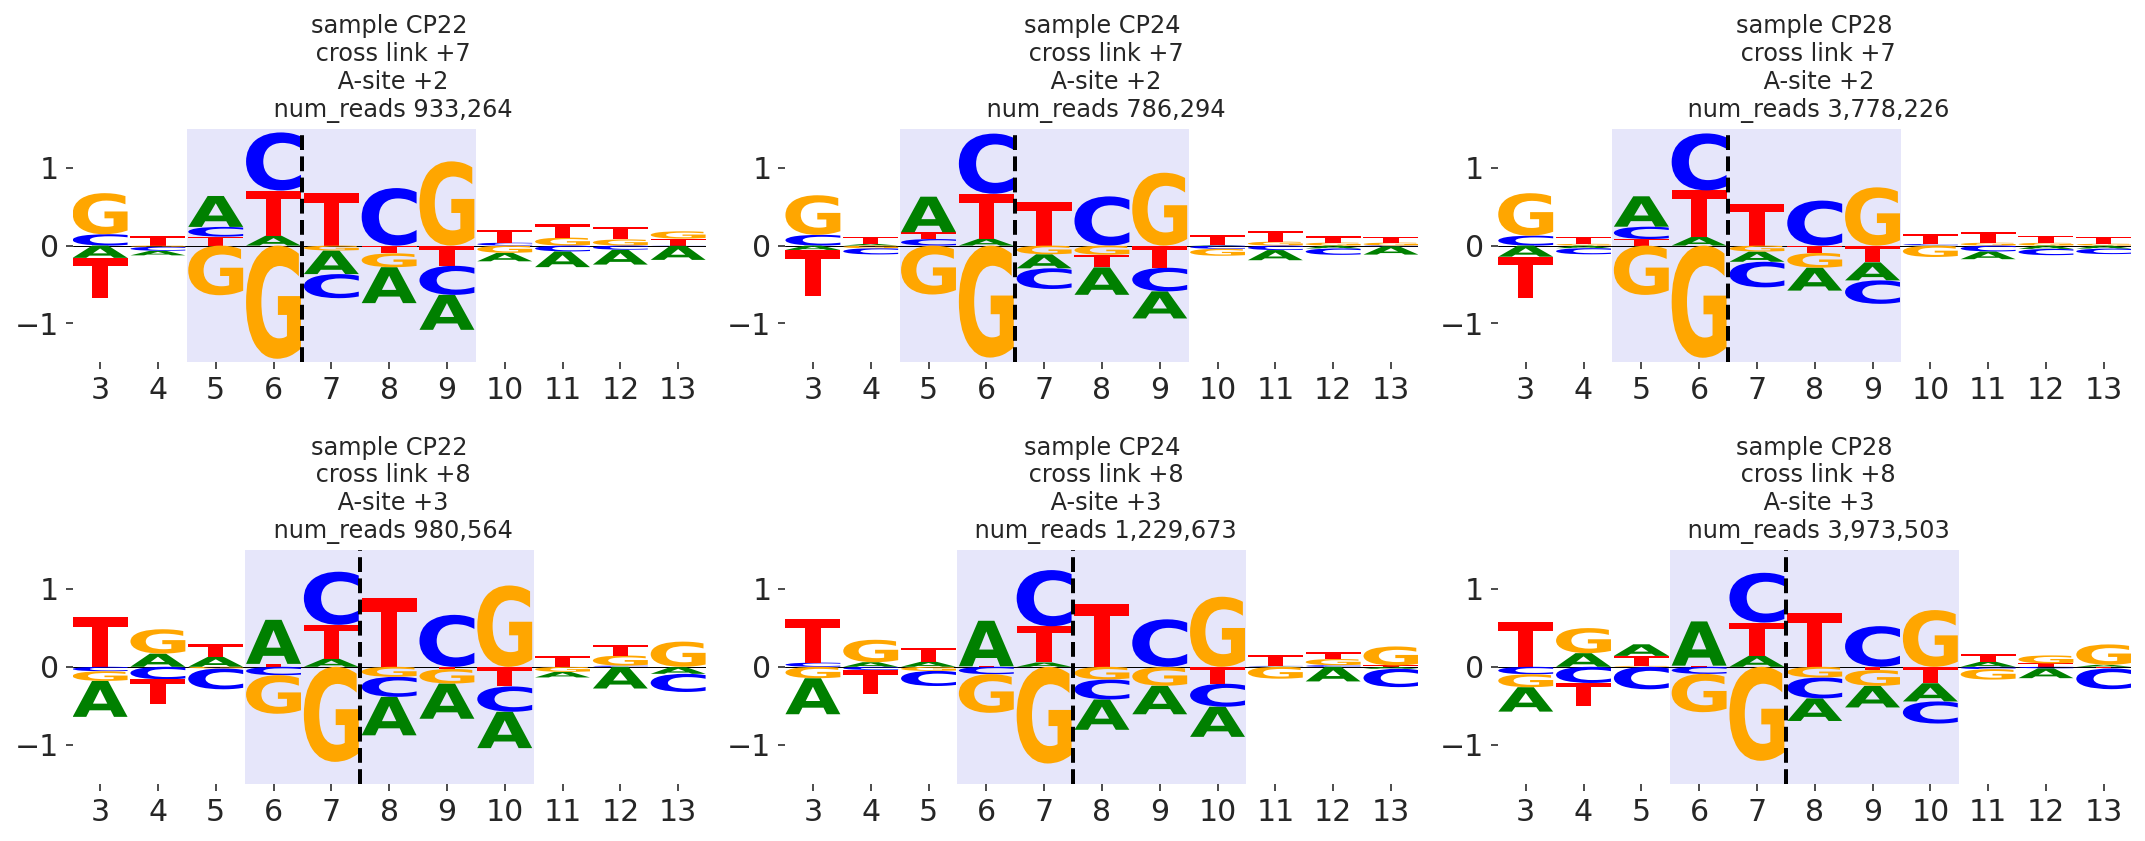

In [5]:
# Template probability mat
template_prob_mat = pd.read_csv('./2020_XACT_seq_data/template_probability_2020.csv.gz', index_col='pos')
template_prob_mat.head()
# Xlink position range for draw bias logos
x_loc_range = [7, 8]
# initialization of the plots
figwidth=int(5*len(pRif_sample_names))
figheight=int(3*len(x_loc_range))

fig, axs = plt.subplots(len(x_loc_range),
                        len(pRif_sample_names), 
                        figsize=(figwidth,figheight))
axs = np.reshape(axs, (len(x_loc_range), len(pRif_sample_names)))

for k, sample_name in enumerate(pRif_sample_names):
    # Sample file which umi and 14nt bc are grouped
    print(f'> Reading sample {sample_name}')
    CP_df = pd.read_csv(f'./2020_XACT_seq_data/{sample_name}_raw.csv.gz')
    # find number of reads for each position
    num_reads = CP_df.sum(numeric_only=True).to_frame().T
    plot_bias_range_logos(x_loc_range=x_loc_range, 
                     axis_col=k,
                     axs=axs,
                     df=CP_df,
                     template_prob_mat=template_prob_mat,
                     num_reads=num_reads,
                     sample_name=sample_name,
                     ylim=ylim)
plt.tight_layout()
plt.savefig('./2020_XACT_seq_figs/2020_xlink_ligation_bias_all_replicates.pdf')

#### Average xlink and ligation bias (from the 6 logos above)

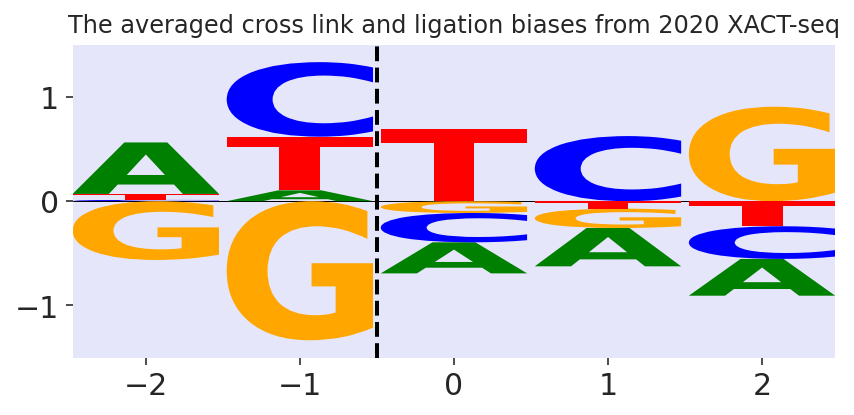

In [6]:
enrich_mat_xact_ave = pd.read_csv('./2020_XACT_seq_data/xlink_lig_ave_xact_seq.csv.gz')
# Plot the average cross link and ligation bias
fig, ax = plt.subplots(1,1, figsize=(6,3))
enrich_mat_xact_ave.index = enrich_mat_xact_ave.index - 2
logo = logomaker.Logo(enrich_mat_xact_ave, center_values=True, 
                      flip_below=False, ax=ax)
logo.style_spines(visible=False)
ax.set_title('The averaged cross link and ligation biases from 2020 XACT-seq')
ax.axvline(x=-0.5, linewidth=2, ls='--', color='k')
ax.set_ylim(ylim)
logo.highlight_position_range(np.amin(enrich_mat_xact_ave.index),
                              np.amax(enrich_mat_xact_ave.index),
                              color='lavender',
                              alpha=1, linewidth=1)

ax.set_xticks(np.arange(-2,3))
plt.tight_layout()
plt.savefig('./2020_XACT_seq_figs/2020_average_xlink_ligation_bias.pdf')

### non Rif samples CP21, CP23, CP27 final logos for +5 to +9

In [7]:
def plot_range_logos(x_loc_range,
                     axis_col,
                     axs,
                     df,
                     num_reads,
                     sample_name,
                     ylim=[-1.5,1.5],
                     center_values=True,
                     flip_below=False):
    """
    x_loc_range: cross link range to plot logos for each sample
    axis_col: each sample will be plotted columnwise. 
                axis_col is and integer as an index of the column
    axs: matplotlib axis array
    df: pivot dataframe for each sample
    num_reads: dataframe containing number of reads for each location.
    """
    seqs = CP_df['pe']
    for k, x_loc in enumerate(x_loc_range):
        ax = axs[k,axis_col]
        fg_ct = CP_df[str(x_loc)].values
        n_reads = num_reads[str(x_loc)]
        fg_prob_mat = logomaker.alignment_to_matrix(sequences=seqs, 
                                                    to_type='probability',
                                                    counts=fg_ct)
        enrich_mat = np.log2(fg_prob_mat)
        # Start at +3 instead of 0 for the enrichement matrix
        enrich_mat.index = enrich_mat.index+3
        logo = logomaker.Logo(enrich_mat, 
                              center_values=center_values, 
                              ax=ax,
                              flip_below=flip_below)
        logo.style_spines(visible=False)
        a_loc = x_loc - 5

        title = f'{sample_name}\ncross link +{x_loc}\n A-site +{a_loc} \n num reads {int(n_reads):,}'
        
        ax.set_title(title)
        ax.axvline(x=x_loc-0.5, linewidth=2, ls='--', color='k')
        ax.set_ylim(ylim)
        logo.highlight_position_range(int(x_loc)-2,
                                      int(x_loc)+2,
                                      color='lavender',
                                      alpha=1, linewidth=1)
        logo.highlight_position_range(int(x_loc)-7,
                                      int(x_loc)-4,
                                      color='bisque',
                                      alpha=1, linewidth=1)
        
        ax.set_xticks(np.arange(3,14))

> Reading sample CP21
> Reading sample CP23
> Reading sample CP27


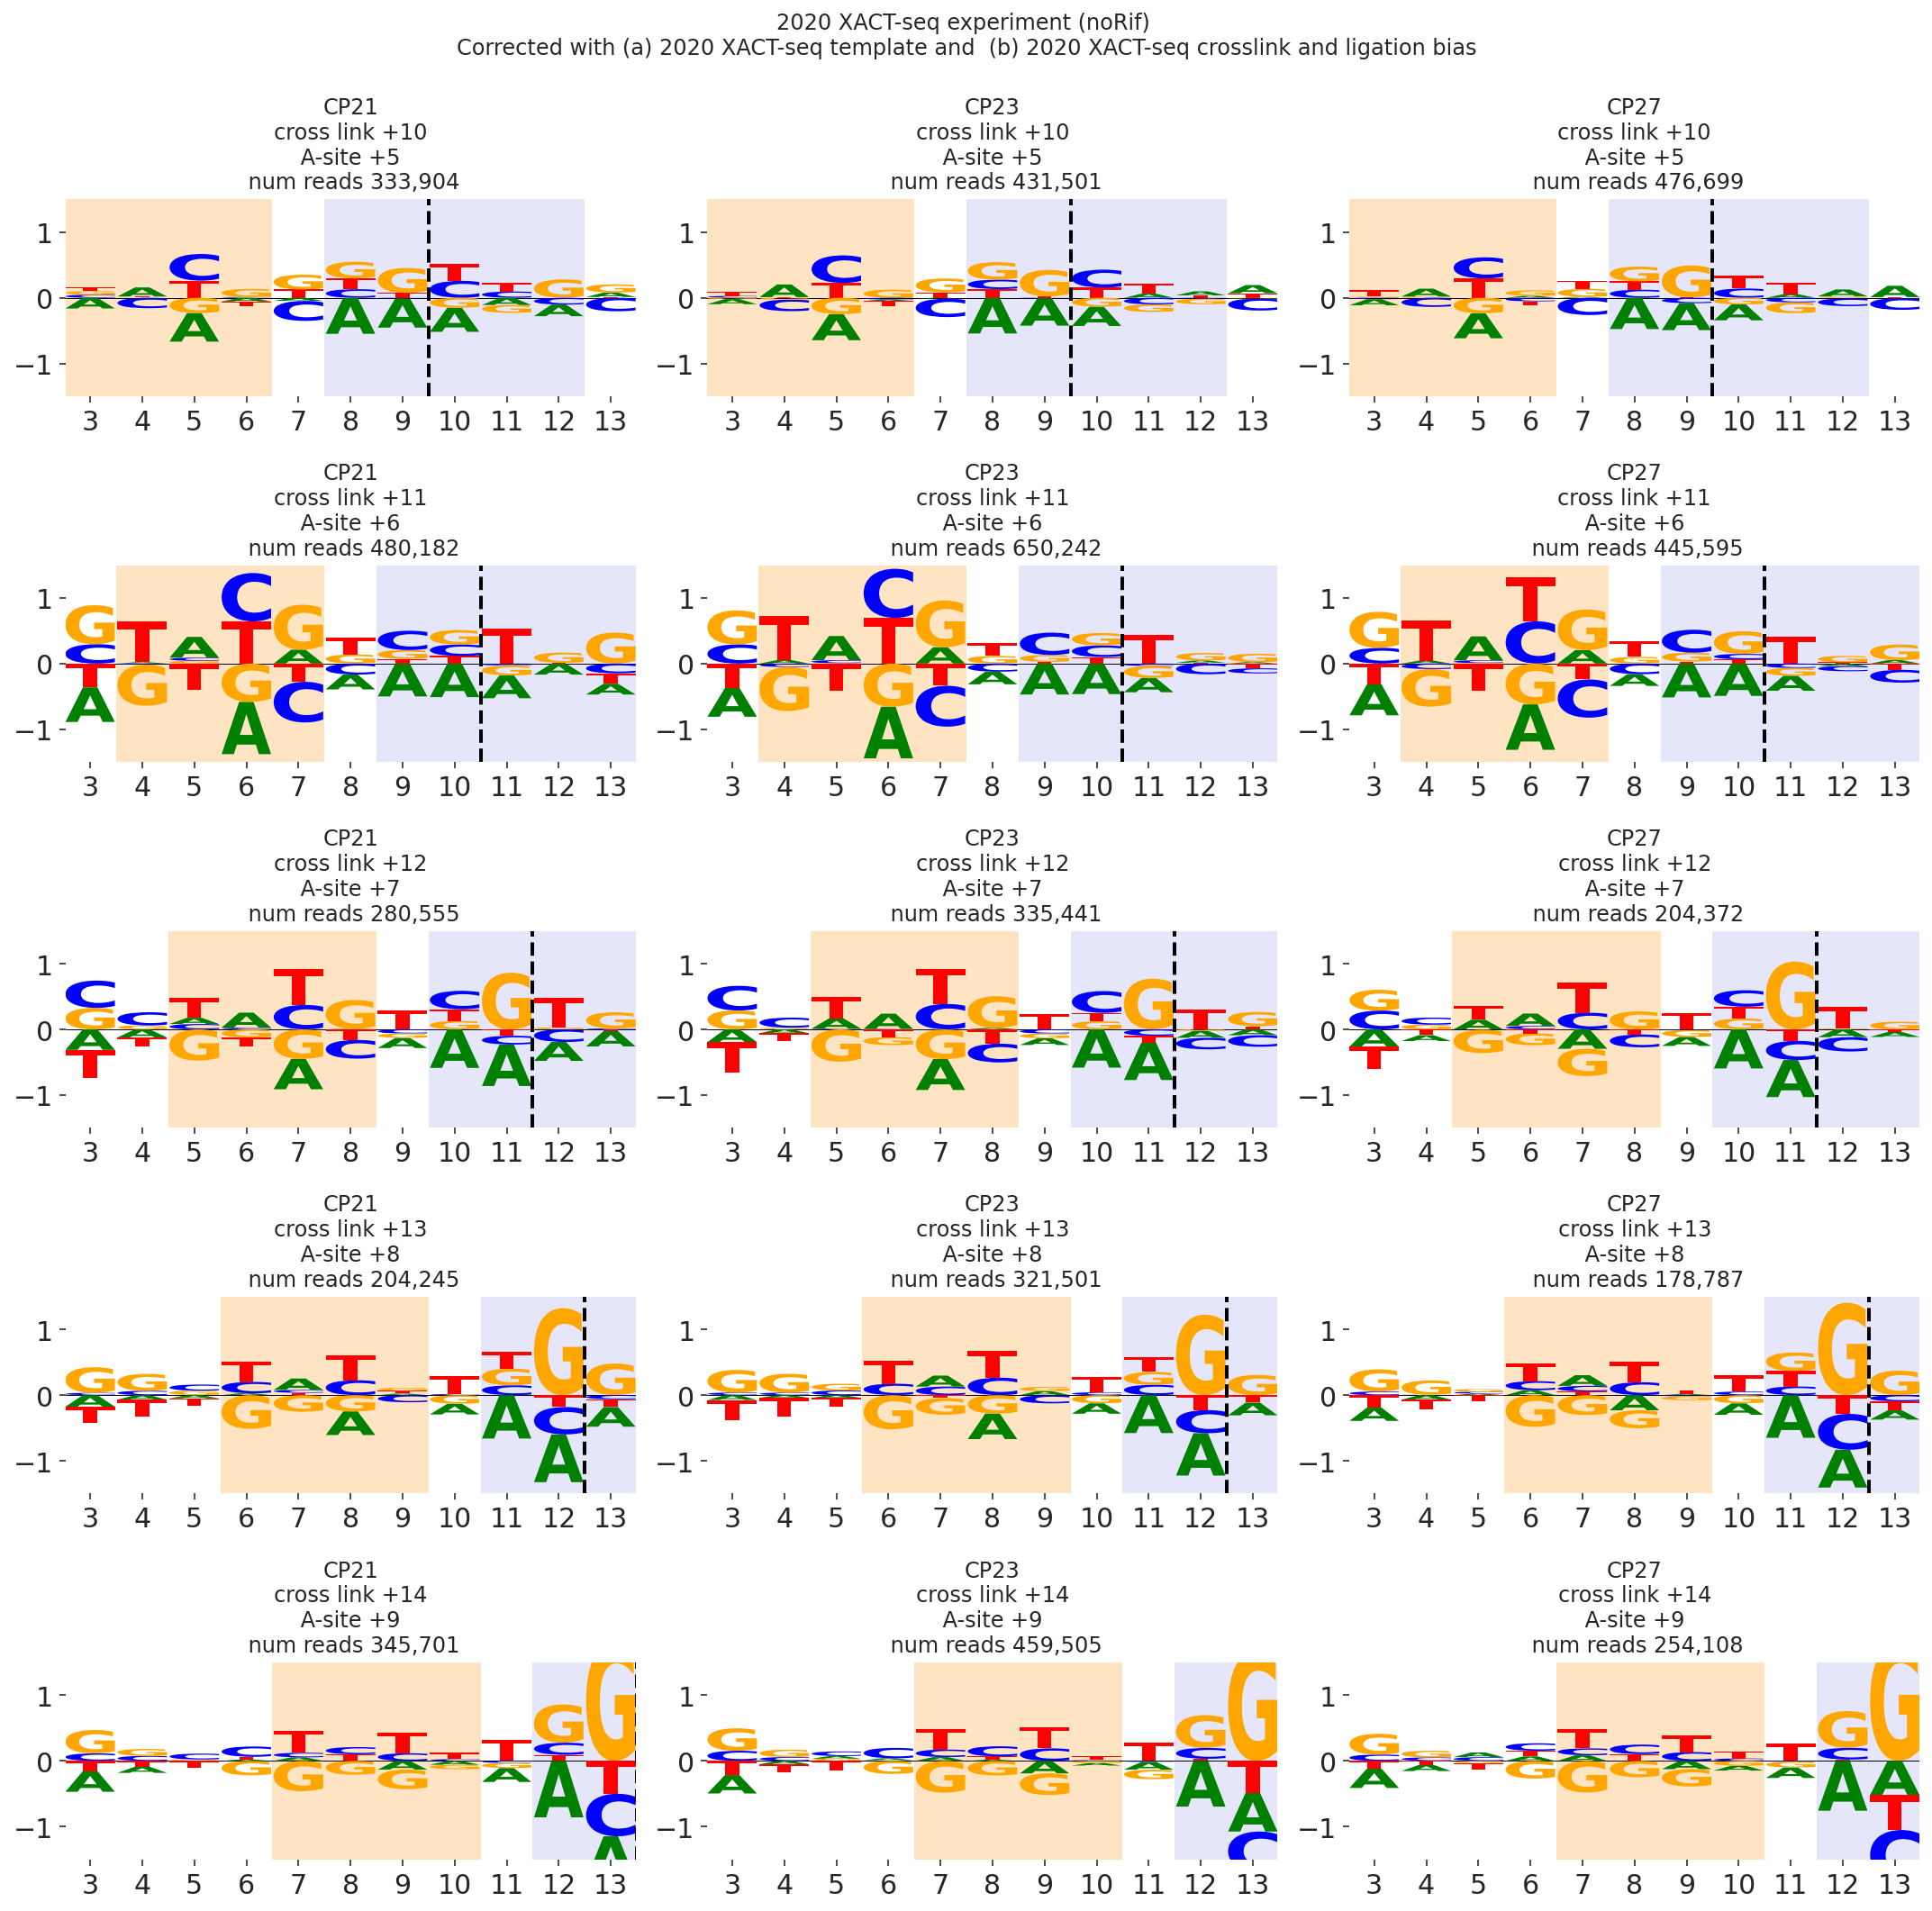

In [8]:
# Draw the rescaled logos 
xlink_range = np.arange(10, 15)                    
# initialization of the plots
figwidth=int(5*len(noRif_sample_names))
figheight=int(3*len(xlink_range))

fig, axs = plt.subplots(len(xlink_range),
                        len(noRif_sample_names), 
                        figsize=(figwidth,figheight))
axs = np.reshape(axs, (len(xlink_range), len(noRif_sample_names)))

for k, sample_name in enumerate(noRif_sample_names):
    print(f'> Reading sample {sample_name}')
    CP_df = pd.read_csv(f'./2020_XACT_seq_data/{sample_name}_rescaled.csv.gz')
    # find number of reads for each position
    num_reads = CP_df.sum(numeric_only=True).to_frame().T
    plot_range_logos(x_loc_range=xlink_range, 
                     axis_col=k,
                     axs=axs,
                     df=CP_df,
                     num_reads=num_reads,
                     sample_name=sample_name,
                     ylim=ylim)
title = (f"2020 XACT-seq experiment (noRif) \n"
          "Corrected with (a) 2020 XACT-seq template and  "
          "(b) 2020 XACT-seq crosslink and ligation bias\n")
plt.suptitle(title)
plt.tight_layout()
plt.savefig('./2020_XACT_seq_figs/2020_Asite5-9_all_reps.pdf')

#### Plot global logo for each noRif samples

> Reading global logo for CP21
> Reading global logo for CP23
> Reading global logo for CP27


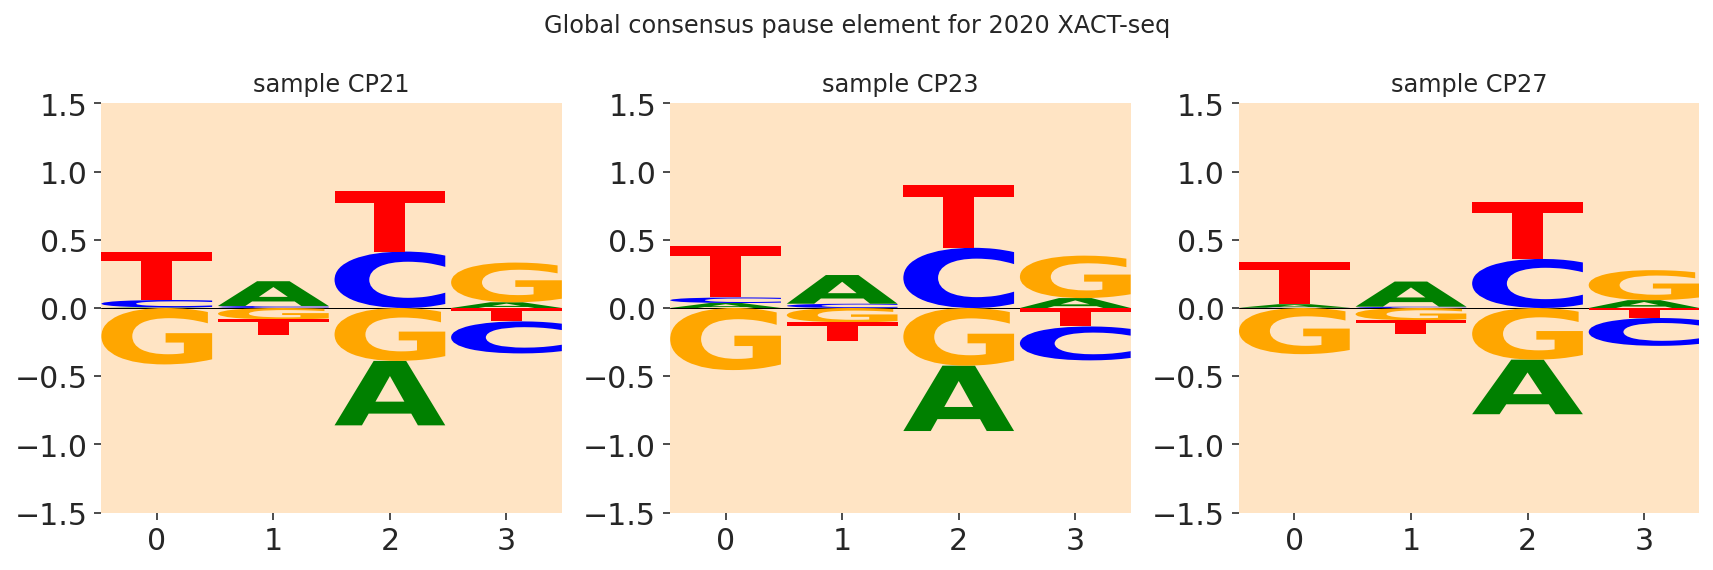

In [9]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

for k, sample_name in enumerate(noRif_sample_names):
    print(f'> Reading global logo for {sample_name}')
    enrich_4nt = pd.read_csv(f'./2020_XACT_seq_data/global_logo_{sample_name}.csv.gz')
    logo = logomaker.Logo(enrich_4nt, center_values=True, 
                      flip_below=False, ax=axs[k])
    logo.style_spines(visible=False)
    axs[k].set_ylim(ylim)
    logo.highlight_position_range(np.amin(enrich_4nt.index),
                              np.amax(enrich_4nt.index),
                              color='bisque',
                              alpha=1, linewidth=1)
    axs[k].set_title(f'sample {sample_name}')
plt.suptitle('Global consensus pause element for 2020 XACT-seq')
plt.tight_layout()
plt.savefig('./2020_XACT_seq_figs/2020_global_logo_all_replicates.pdf')

#### Plot global logo average across all replicates

> Reading global logo for CP21
> Reading global logo for CP23
> Reading global logo for CP27


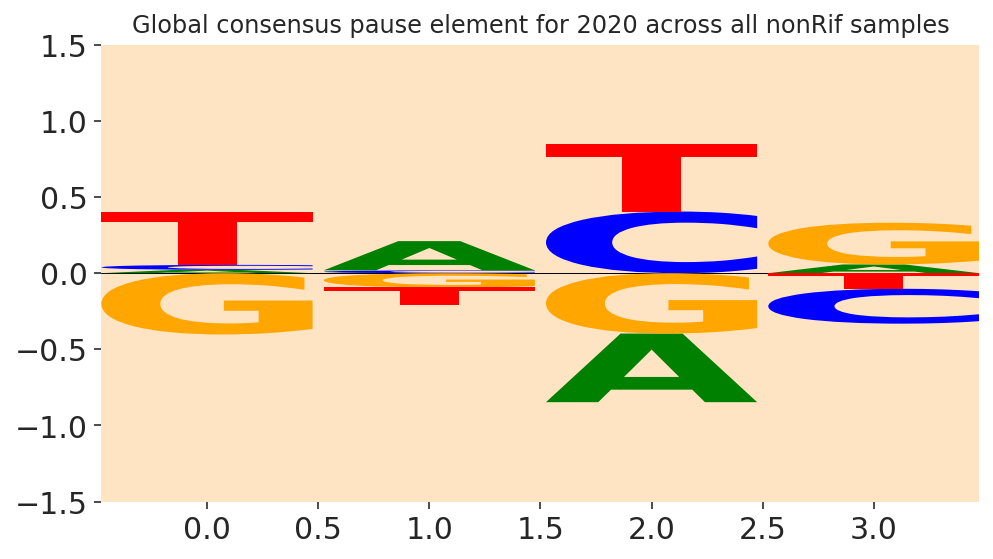

In [10]:
enrich_4nt_ave = 0
for k, sample_name in enumerate(noRif_sample_names):
    print(f'> Reading global logo for {sample_name}')
    enrich_4nt = pd.read_csv(f'./2020_XACT_seq_data/global_logo_{sample_name}.csv.gz')
    enrich_4nt_ave = enrich_4nt_ave + enrich_4nt
enrich_4nt_ave = enrich_4nt_ave/len(noRif_sample_names)

fig, ax = plt.subplots(1,1, figsize=(7,4))
logo = logomaker.Logo(enrich_4nt_ave, center_values=True, 
                      flip_below=False, ax=ax)
logo.style_spines(visible=False)
ax.set_ylim(ylim)
logo.highlight_position_range(np.amin(enrich_4nt_ave.index),
                          np.amax(enrich_4nt_ave.index),
                          color='bisque',
                          alpha=1, linewidth=1)
ax.set_title(f'Global consensus pause element for 2020 across all nonRif samples')
plt.tight_layout()
plt.savefig('./2020_XACT_seq_figs/2020_global_logo_final.pdf')

### Plot final read counts for samples

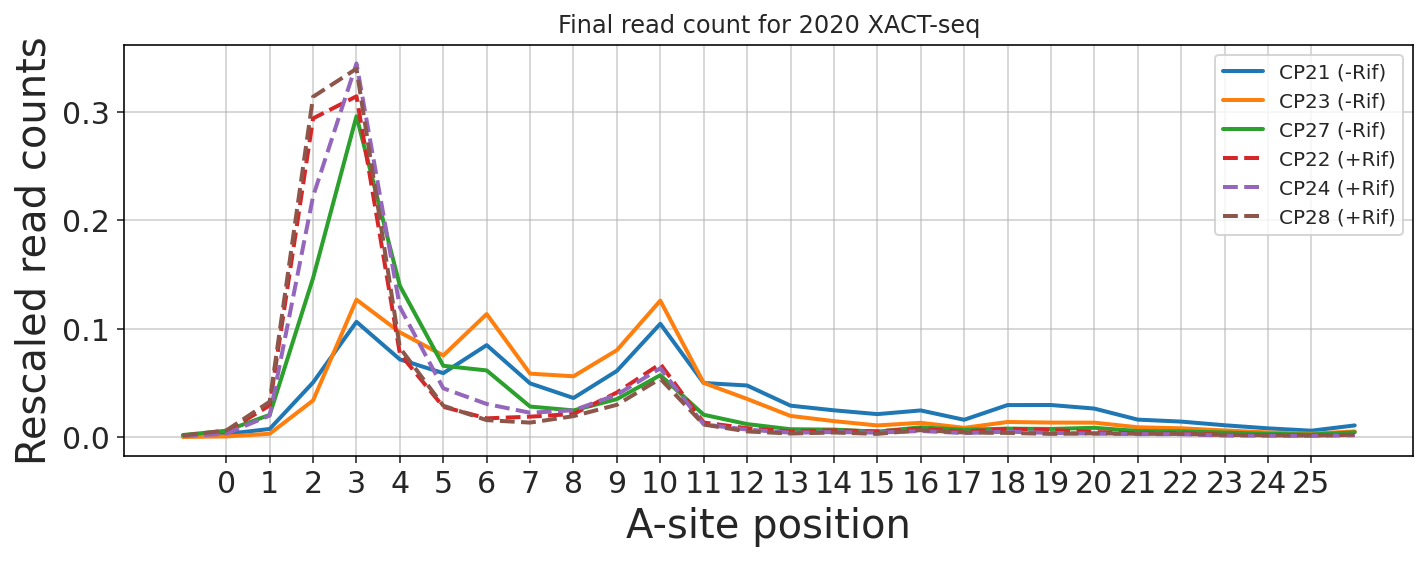

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
for k, sample_name in enumerate(noRif_sample_names):
    read_counts = pd.read_csv(f'./2020_XACT_seq_data/rescale_counts_{sample_name}.csv.gz')
    x = np.array(read_counts.columns.to_list(), dtype=np.int64)
    y = read_counts.values.flatten()
    sum_y = np.sum(y)
    ax.plot(x-5, y/sum_y, label=f'{sample_name} (-Rif)',lw=2)

    
for k, sample_name in enumerate(pRif_sample_names):
    read_counts = pd.read_csv(f'./2020_XACT_seq_data/rescale_counts_{sample_name}.csv.gz')
    x = np.array(read_counts.columns.to_list(), dtype=np.int64)
    y = read_counts.values.flatten()
    sum_y = np.sum(y)
    ax.plot(x-5, y/sum_y, '--', label=f'{sample_name} (+Rif)', lw=2)

ax.legend(frameon=True)
ax.set_ylabel('Rescaled read counts')
ax.set_xlabel('A-site position')
ax.set_xticks(np.arange(0,26))
ax.grid(alpha=0.6)
plt.title('Final read count for 2020 XACT-seq')
plt.tight_layout()
plt.savefig('./2020_XACT_seq_figs/2020_readcount_histogram_all_replicates.pdf')

### Plot rescaled read count for wild type TTGTGAGAGCG

> Reading sample CP21
> Reading sample CP23
> Reading sample CP27
> Reading sample CP22
> Reading sample CP24
> Reading sample CP28


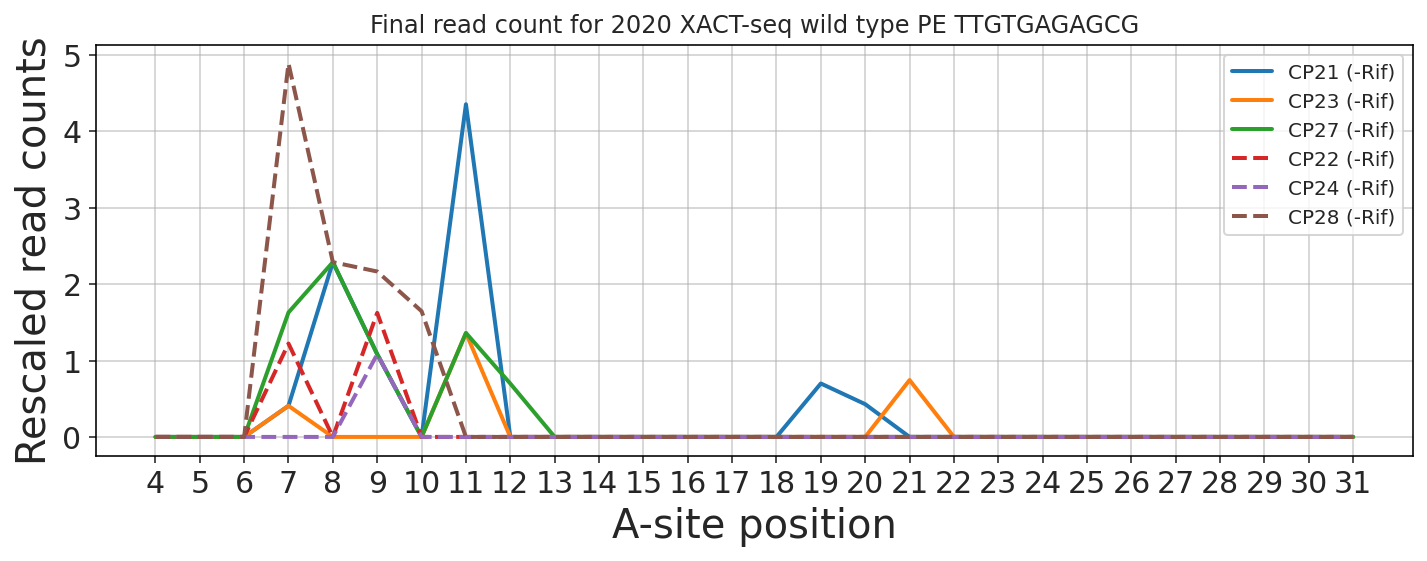

In [12]:
wild_type_seq = 'TTGTGAGAGCG'
fig, ax = plt.subplots(1,1, figsize=(10,4))

for k, sample_name in enumerate(noRif_sample_names):
    print(f'> Reading sample {sample_name}')
    CP_df = pd.read_csv(f'./2020_XACT_seq_data/{sample_name}_rescaled.csv.gz')
    df = CP_df[CP_df['pe']==wild_type_seq]
    x = np.array(df.columns.to_list())[1:]
    y = np.array(df.values)[:,1:]
    ax.plot(x,y.flatten(), label=f'{sample_name} (-Rif)',lw=2)

for k, sample_name in enumerate(pRif_sample_names):
    print(f'> Reading sample {sample_name}')
    CP_df = pd.read_csv(f'./2020_XACT_seq_data/{sample_name}_rescaled.csv.gz')
    df = CP_df[CP_df['pe']==wild_type_seq]
    x = np.array(df.columns.to_list())[1:]
    y = np.array(df.values)[:,1:]
    ax.plot(x,y.flatten(), '--', label=f'{sample_name} (-Rif)',lw=2)
ax.legend(frameon=True)
ax.grid(alpha=0.6)
plt.title(f'Final read count for 2020 XACT-seq wild type PE {wild_type_seq}')
ax.set_ylabel('Rescaled read counts')
ax.set_xlabel('A-site position')
plt.tight_layout()